In [ ]:
from data_admin import Database
Data_admin = Database()

In [6]:
from gensim import corpora, models
import pandas as pd
import codecs
import re
import jieba
import jieba.posseg
import matplotlib.pyplot as plt

In [7]:
def chinese_word_pre(text_data):
    whole = []
    """
    对词汇进行预处理
    """
    # 加载停用词
    stopkey = [w.strip() for w in codecs.open('../stop_dic/stopwords.txt', 'r',encoding='utf-8').readlines()]
    # 将字母转化为小写，并去除数字
    text_data = text_data.lower()
    text_data = re.sub('\d+',"",text_data)
    # 使用精确模式分词
    # text_data = list(jieba.cut(text_data,cut_all=False))
    text_data = jieba.posseg.cut(text_data)
    flag_list = ['n','nz','vn']
    for one in text_data:
        if one.word not in stopkey and len(one.word)>1 and one.flag in flag_list :
            whole.append(one.word)
    return whole


In [9]:
sql = 'select answer_text from zhihu_movie_cleaned where sentiment = 0'
raw_Data = Data_admin.database(sql)
data = pd.DataFrame(raw_Data)

data

,0
0,我不懂，只是作为普通观众单纯的提的问题，为什么包括影中哪吒敖丙，还有别的国漫例如孙悟空。在所...
1,精彩的都已经在电影预告里，看了正片觉得一般，可能是被那句具有张力的嘶吼拉高了期待值。中等的商...
2,没事别玩泥巴！
3,说实话我不喜欢这部作品。\n主要是魔改的太过了不适合小孩子看，成年人也未必能接受这么前卫的风...
4,当年看完这电影，心里就隐隐不舒服，这电影主要是面向小孩子，真要把男主形象设计的这么丑吗，还是...
...,...
13308,知乎什么时候成为电影宣传推广的一种渠道了？
13309,谢邀～\n赚钱无止境！
13310,工作才有退休，事业没有。
13311,退休了还要来知乎答题 拍电影就不算什么了吧


In [10]:
contents = []
for index in data.index:
    content = data.loc[index].values[0]
    content = chinese_word_pre(content)
    contents.append(' '.join(content))
contents = pd.DataFrame(contents)
contents.columns = ['text']
contents

,text
0,普通 观众 问题 国漫 嘴唇 眼窝
1,精彩 电影 正片 期待值 商业 爆米花 动画电影 观感
2,泥巴
3,作品 小孩子 成年人 前卫 风格 评分 原因 众人 小孩 角色 形象 同情 作者 众人 有点...
4,电影 电影 面向 小孩子 男主 形象设计 性本 人性 全城 百姓 魔童 魔童 父母 领导 领...
...,...
13308,电影 宣传 渠道
13309,
13310,工作 事业
13311,答题 拍电影


In [11]:
train = []
for index in contents.index:
    line = [word.strip() for word in contents.loc[index].values[0].split(' ')]
    train.append(line)  
train

[['普通', '观众', '问题', '国漫', '嘴唇', '眼窝'],
 ['精彩', '电影', '正片', '期待值', '商业', '爆米花', '动画电影', '观感'],
 ['泥巴'],
 ['作品',
  '小孩子',
  '成年人',
  '前卫',
  '风格',
  '评分',
  '原因',
  '众人',
  '小孩',
  '角色',
  '形象',
  '同情',
  '作者',
  '众人',
  '有点',
  '非主流',
  '形象',
  '过头',
  '阴间',
  '小孩',
  '太乙',
  '真人',
  '孩子',
  '小孩'],
 ['电影',
  '电影',
  '面向',
  '小孩子',
  '男主',
  '形象设计',
  '性本',
  '人性',
  '全城',
  '百姓',
  '魔童',
  '魔童',
  '父母',
  '领导',
  '领导',
  '全城',
  '百姓',
  '魔童',
  '逻辑',
  '关上门',
  '其乐融融',
  '刻画',
  '龙杠',
  '剧情',
  '故事',
  '电影',
  '编剧',
  '故事',
  '偶像',
  '故事',
  '冷饭',
  '画面'],
 ['原著', '港版', '创作', '形象', '水准', '魔童', '主角', '人会'],
 ['经典', '反观', '续作', '三观', '剧情'],
 ['动漫', '电影', '普通', '水准', '电影'],
 ['模型',
  '超人',
  '总动员',
  '剧情',
  '不合理',
  '母子',
  '对话',
  '情侣',
  '对话',
  '铁质',
  '武器',
  '造型',
  '战国',
  '青铜',
  '武器',
  '造型',
  '老实',
  '大唐',
  '陌刀',
  '汉字',
  '人定胜天',
  '天命',
  '细节',
  '作品',
  '影视',
  '工作者',
  '榜样',
  '电影院',
  '观众们',
  '表情'],
 ['配位',
  '镜头',
  '功夫',
  '功夫',
  '元素',
  '文化',
  '精神',
  '刻画',
  '百姓',
 

In [12]:
import gensim
from gensim import corpora, models


def lda_model_values(num_topics, corpus, dictionary):
    x = [] # x轴
    perplexity_values = [] # 困惑度
    coherence_values = []   # 一致性
    model_list = [] # 存储对应主题数量下的lda模型,便于生成可视化网页

    for topic in range(num_topics):
        print("主题数量：", topic+1)
        lda_model = models.LdaModel(corpus=corpus, num_topics=topic+1, id2word =dictionary, chunksize = 2000, passes=20, iterations = 400,random_state=1)
        model_list.append(lda_model)
        x.append(topic+1)
        perplexity_values.append(lda_model.log_perplexity(corpus))

        coherencemodel = models.CoherenceModel(model=lda_model, texts=train, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print("该主题评价完成\n")
    return model_list, x, perplexity_values, coherence_values

主题数量： 1
该主题评价完成

主题数量： 2
该主题评价完成

主题数量： 3
该主题评价完成

主题数量： 4
该主题评价完成

主题数量： 5
该主题评价完成

主题数量： 6
该主题评价完成

主题数量： 7
该主题评价完成

主题数量： 8
该主题评价完成

主题数量： 9
该主题评价完成

主题数量： 10
该主题评价完成

主题数量： 11
该主题评价完成

主题数量： 12
该主题评价完成

主题数量： 13
该主题评价完成

主题数量： 14
该主题评价完成

主题数量： 15
该主题评价完成

主题数量： 16
该主题评价完成

主题数量： 17
该主题评价完成

主题数量： 18
该主题评价完成

主题数量： 19
该主题评价完成

主题数量： 20
该主题评价完成



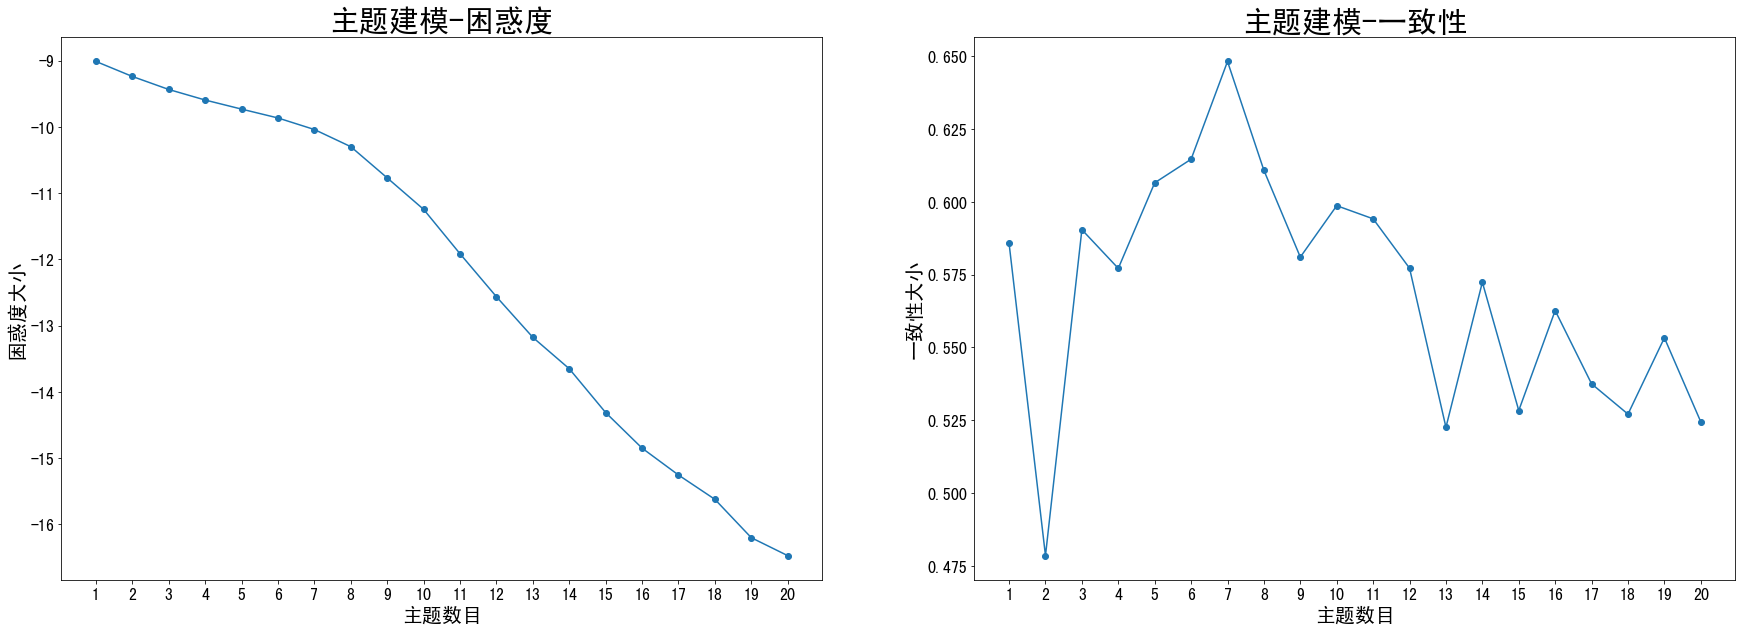

In [13]:
import matplotlib.pyplot as plt
import matplotlib
from pylab import xticks,yticks,np

num_topics = 10
dictionary = corpora.Dictionary(train)
# dictionary.filter_n_most_frequent(200)
corpus =  [dictionary.doc2bow(text) for text in train] 
corpus_tfidf = models.TfidfModel(corpus)[corpus]


# 调用准备函数
model_list, x, perplexity_values, coherence_values = lda_model_values(num_topics=num_topics, corpus=corpus_tfidf, dictionary=dictionary) 

# 绘制困惑度和一致性折线图
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
fig = plt.figure(figsize=(30,10))


ax1 = fig.add_subplot(1, 2, 1)
plt.plot(x, perplexity_values, marker="o")
plt.title("主题建模-困惑度",fontsize=30)
plt.xlabel('主题数目',fontsize=20)
plt.ylabel('困惑度大小',fontsize=20)
xticks(np.linspace(1, num_topics, num_topics, endpoint=True),size=16) # 保证x轴刻度为1
yticks(size=16)

ax2 = fig.add_subplot(1, 2, 2)
plt.plot(x, coherence_values, marker="o")
plt.title("主题建模-一致性",fontsize=30)
plt.xlabel("主题数目",fontsize=20)
plt.ylabel("一致性大小",fontsize=20)
xticks(np.linspace(1, num_topics, num_topics, endpoint=True),size=16)
yticks(size=16)


plt.show()

In [16]:
lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=7, passes = 30,random_state=1)

In [17]:
topic_list=lda.print_topics()
print(topic_list)
 
# for i in lda.get_document_topics(corpus)[:]:
#     listj=[]
#     for j in i:
#         listj.append(j[1])
#     bz=listj.index(max(listj))
#     print(i[bz][0])

[(0, '0.088*"电影" + 0.040*"流量" + 0.023*"票房" + 0.021*"观众" + 0.016*"流浪" + 0.015*"粉丝" + 0.014*"演员" + 0.014*"地球" + 0.014*"科幻" + 0.014*"堡垒"'), (1, '0.029*"地球" + 0.028*"行动" + 0.012*"战狼" + 0.010*"人类" + 0.009*"国家" + 0.009*"战争" + 0.008*"流浪" + 0.008*"军人" + 0.007*"狙击手" + 0.007*"电影"'), (2, '0.020*"孩子" + 0.014*"父母" + 0.014*"龙族" + 0.013*"百姓" + 0.013*"真人" + 0.013*"太乙" + 0.012*"命运" + 0.012*"魔丸" + 0.010*"魔童" + 0.008*"父亲"'), (3, '0.074*"电影" + 0.032*"剧情" + 0.021*"感觉" + 0.017*"故事" + 0.014*"有点" + 0.013*"人物" + 0.013*"问题" + 0.010*"角色" + 0.010*"观众" + 0.008*"评价"'), (4, '0.070*"" + 0.014*"卧槽" + 0.007*"女朋友" + 0.007*"老子" + 0.005*"变老" + 0.005*"网友" + 0.005*"医生" + 0.005*"灾难片" + 0.005*"户口" + 0.005*"男生"'), (5, '0.046*"美队" + 0.033*"钢铁" + 0.025*"队长" + 0.023*"时间" + 0.018*"宇宙" + 0.012*"手套" + 0.012*"复仇者" + 0.012*"铁人" + 0.011*"鹰眼" + 0.011*"剧透"'), (6, '0.016*"工作" + 0.010*"嫌疑人" + 0.010*"民警" + 0.009*"同事" + 0.009*"橘子" + 0.008*"事情" + 0.008*"现场" + 0.008*"派出所" + 0.007*"爸爸" + 0.006*"情况"')]
